가우시안 믹스쳐 모델 (GMM, Gaussian Mixture Models)
---------------------

-----------

## 데모 - 소비자 이탈률(churn rate) 예측

주어진 소비자들의 세트에서, 만약 한달에 소비자들이 얼마나 많은 돈을 출금하거나 입금하는지 알고 있다면, 만약 그들이 다음 달에도 계속 앱을 사용한다면 우리가 예측할 수 있다고 해봅시다.<br><br><br>

<img src="https://qph.ec.quoracdn.net/main-qimg-e662c860801e26c6d1a41a7de35a7884-c" width="250" height="250"><br>

가우시안 믹스쳐 모델(GMM, EM Clustering이라고도 한다)은 보편적으로 사용되는 generative unsupervised clustering이다. GMM의 기본원리는 매우 간단하다: 주어진 데이터셋에서, 각 포인트는 linearly combining multiple multivariate Gaussians로 생성된다. 

--------------

### 가우시안이 뭐지?<br>

#### 분포는 실험의 outcomes과 각 outcome과 관련있는 확률을 리스팅(listing)한 것이다.<br><br>

<img src="http://www.amathsdictionaryforkids.com/qr/fimages/frequencyDistributionTable.gif" width="250" height="250">

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Empirical_Rule.PNG/450px-Empirical_Rule.PNG" width="250" height="250"><br>

<img src="https://thecuriousastronomer.files.wordpress.com/2014/06/1000px-normal_distribution_pdf-svg.png" width="250" height="250">

<img src="http://i.imgur.com/iDNiL13.jpg" width="250" height="250"><br>

가우시안 분포의 공식은 확률 밀도 함수(PDF, probability density function)라고도 한다. continuous random variable의 함수이며, interval을 두고 있는 적분은 변수의 값이 같은 interval안에 있을 확률을 제공한다.<br>

----------

## 가우시안 믹스처 모델은 뭐지?<br>

여러개의 확률 분포로 이루어진 확률 분포이다.<br><br>

<img src="http://i.imgur.com/F8Df1m3.png" width="250" height="250"><br><br>

공분산은 두번째 변수안의 변화와 관련성이 있는 첫번째 변수가 어떻게 바뀌는지를 측정하는거다.<br>

세부적으로는, 공분산은 선형 연관성(linearly associated)이 있는 두 변수의 차수(degree)를 측정한다.<br>

하지만, 비공식적으로 얼마나 두 변수가 monotonically related한가를 일반적으로 측정할때도 종종 사용한다.<br><br>
<img src="http://i.imgur.com/tBtZ0W4.png" width="500" height="500">

<img src="http://i.imgur.com/750NscW.png" width="500" height="500">

<img src="http://4.bp.blogspot.com/-zuCQBrN8990/VGt45PZHXhI/AAAAAAAAA1E/jtQQaAj-PMc/s1600/gmm2.png" width="250" height="250">

<img src="http://dirichletprocess.weebly.com/uploads/1/9/8/4/19847957/3346416.png?1367446693" width="250" height="250">

<img src="http://i.imgur.com/0vZg6NX.png" width="500" height="500">

<img src="http://recognize-speech.com/images/robert/gmm_intro/mvg1.png" width="250" height="250"><br><br>


아래서는 K means와 비슷하다<br>

<img src="http://i.imgur.com/y5PeNL0.png" width="500" height="500"><br>

Hard vs Soft Assignment. Hard는 mis grouping을 주도할 수 있다.<br><br><br>


가우시안 믹스처:<br>

데이터 포인트를 클러스터에 Hard assigning 하는 대신, 만약 데이터 포인트가 어느 그룹에 속하는지 어디에 있는지 불확실하다면, 이 방법을 쓸 수 있다. 포인트가 속한 클러스터의 실현 가능도(feasibility, 적당성?)을 결정하기 위해 샘플의 확률을 사용한다. <br><br>

-----------------

#### 어떻게 optimized하나?
<br>

EM 알고리즘 (The Expectation Maximization Algorithm)<br><br>

<img src="http://i.imgur.com/B5HgxrH.png" width="250" height="250">

------------

<br>
#### Gradient Descent와의 비교<br>

서로 다른 방법들을 사용해서 MLE(Maximum Likelihood Estimates)추정을 얻을 수 있는데, optimization 알고리즘은 그 중 하나이다. 다른 측면에선, gradient descent를 다른 likelihood 함수보다 함수를 최대화하는데에도 사용할 수 있다.<br><br>

---------

#### 언제 그걸 쓸 수 있지?<br>

unlabeld data를 갖고 있고 그걸 classify하고 싶을때면 언제든 쓸 수 있다, 만약 데이터가 정규 분포되어있다면 말이다.<br>

소비자 이탈률 예측<br>
비정상 탐지<br>
오브젝트 추적<br><br>
<img src="http://i.imgur.com/cm0UxfF.png" width="350" height="350"><br>

#### 관련있는 레포들<br>
https://github.com/benathi/word2gm 텐서플로우 사용 + 장르에 따라 GMM으로 노래 가사 분류<br>
https://github.com/GaborLengyel/Finite-Gaussian-Mixture-models/blob/master/Finite%20Gaussian%20Mixture%20models.ipynb  <br>
다양한 목적의 튜토리얼<br>


--------------------

Dependencies 임포트와 분포 그래프 시험 
------


In [1]:
reset -fs

In [3]:
#For plotting
import matplotlib.pyplot as plt
#for matrix math
import numpy as np
#for normalization + probability density function computation
from scipy import stats
#for plotting
import seaborn as sns
sns.set_style("white")
%matplotlib inline

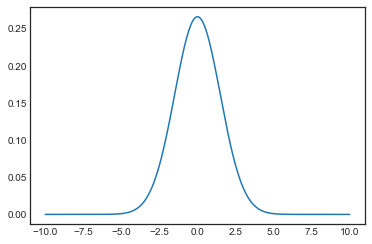

In [4]:
#Return evenly spaced numbers over a specified interval.
x = np.linspace(start=-10, stop=10, num=1000)
#A normal continuous random variable.
#The location (loc) keyword specifies the mean. The scale (scale) keyword specifies the standard deviation.
y = stats.norm.pdf(x, loc=0, scale=1.5) 
#plot it!
plt.plot(x, y)

In [5]:
#for data preprocessing
import pandas as pd

In [6]:
#read our dataset
df = pd.read_csv("bimodal_example.csv")
#show first 5 examples (in BTC)
df.head(n=5)

,x
0,0.252851
1,-1.034562
2,3.319558
3,4.552363
4,-0.775995


In [7]:
#show the distribution of the data as a histogram
data = df.x

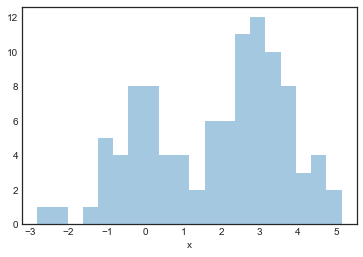

In [8]:
#plot histogram
sns.distplot(data, bins=20, kde=False)

정규 분포가 이 데이터에 유용한 모델일까?

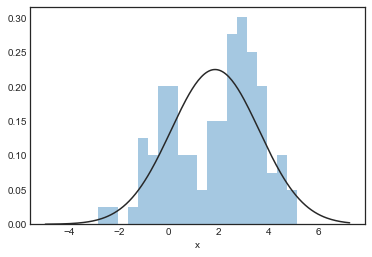

In [9]:
#try to fit a normal distribution to this data
sns.distplot(data, fit=stats.norm, bins=20, kde=False,)

<br>

----
모델 정의 (Define the Model)<br>
-----

두개의 정규 분포 $N(\mu_1, \sigma_1^2)$ and $N(\mu_2, \sigma_2^2)$. <br>

5개의 파라미터가 있다: 그 중 4개는 정규 분포이고, 그 중 하나를 선택할 확률은 1 이상이다. <br>

$w$를 첫번째 Normal로부터 나온 데이터의 확률이라 하자, 이 모델의 파라미터는 $\theta = (w, \mu_1, \sigma_1^2, \mu_2, \sigma_2^2)$.<br><br>

확률 밀도 함수(PDF, Probability Density Function)는:<br>

$$f(x | \theta) = w \  f_1(x \ | \  \mu_1, \sigma_1^2) + (1 - w) \  f_2 (x  \ | \  \mu_2, \sigma_2^2) $$  <br><br>

------------

모델 fit (Fit the Model)
-----

**기댓값-최대화 알고리즘(Expectation-Maximization, EM algorithm)**<br>

<br>
<center><img src="http://www.wilsonmongwe.co.za/wp-content/uploads/2015/07/400px-EM.jpg" width="300"/></center>

-----------

기댓값-최대화 알고리즘(EM algorithm)이란?
------

MLE 또는 MAP를 찾기 위해 반복적인 방법으로 통계적 모델에서 파라미터를 추정한다, 모델은 관측되지 않는 latent variables에 의존한다.<br><br>

--------

기댓값-최대화 (EM) 워크플로우<br>
------------------
<br>
<center><img src="http://people.revoledu.com/kardi/tutorial/EM/images/EM_algorithm.png" width="400"/></center>

실행 사이의 다른점:<br>

- __Expectation (E)__ 단계: 모델의 현 파라미터들을 제공, 확률 분포를 추정한다<br>
- __Maximization (M)__ 단계: 현재 데이터를 제공, 모델을 업데이트 할 파라미터들을 추정

--------------

EM, 더 정석적으로
-----------------

실행 사이의 다른점:<br>


- __Expectation (E)__ 단계: 파라미터들의 현 추정을 사용해서, log-likelihood의 기대값을 위한 함수를 만든다.<br>

- __Maximization (M)__ 단계: E 단계에서 예측한 log-likelihood를 최대화하는 파라미터들을 계산한다.<br>


M 파라미터-추정들은 다음 E 단계안에 있는 latent variables들의 분포를 결정하는데에 사용된다.

-------------

EM은 이어지는 함수를 최대화하려고 노력한다:
-------

- 직접적으로 관측되는 변수 x<br>
- 모델의 θ (theta) 파라미터들<br>
- 직접적으로 관측되지 않거나 / latent variable인 Z<br>
   - Z는 x의 joint (related) 분포이다<br>

--------------

EM 단계들
-----

1. 파라미터들 θ initialize<br>
2. 주어진 θ에서 Z를 위한 최선의 값을 계산<br>
3. θ를 위한 더 나은 추정을 계산하기 위해 Z의 계산된 값을 사용<br>
4. 수렴할때까지 2와 3단계를 반복한다<br>

-------------

EM 단계들, 다른 형태로 해보기
--------------

1. 모델들의 파라미터들 initialize, 랜덤하게 하거나 "smart seeding"하기 <br>

2. E 단계: 주어진 현 파라미터 값에서 latent variable의 사후 확률(posterior probabilities)을 찾음<br>

3. M 단계: 주어진 현 사후 확률들에서 파라미터 값들을 재추정 

4. likelihood 함수의 likelihood를 모니터링하면서 2-3 반복. 수렴하기를 바라면서<br><br>
<img src="http://i.imgur.com/0cTmOja.png" width="500" height="500">

<img src="http://i.imgur.com/8kQ9aa6.png" width="500" height="500">

<img src="http://i.imgur.com/A1j3lqB.png" width="500" height="500">

-------------

데이터로 다시 돌아가기
-----



In [10]:
class Gaussian:
    "Model univariate Gaussian"
    def __init__(self, mu, sigma):
        #mean and standard deviation
        self.mu = mu
        self.sigma = sigma

    #probability density function
    def pdf(self, datum):
        "Probability of a data point given the current parameters"
        u = (datum - self.mu) / abs(self.sigma)
        y = (1 / (sqrt(2 * pi) * abs(self.sigma))) * exp(-u * u / 2)
        return y
    #printing model values
    def __repr__(self):
        return 'Gaussian({0:4.6}, {1:4.6})'.format(self.mu, self.sigma)

In [11]:
#gaussian of best fit
best_single = Gaussian(np.mean(data), np.std(data))
print('Best single Gaussian: μ = {:.2}, σ = {:.2}'.format(best_single.mu, best_single.sigma))

Best single Gaussian: μ = 1.9, σ = 1.8


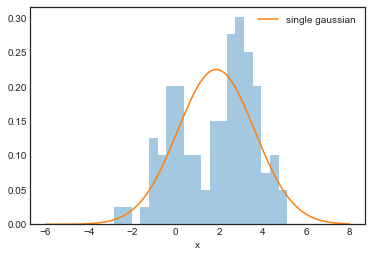

In [12]:
#fit a single gaussian curve to the data
x = np.linspace(-6, 8, 200)
g_single = stats.norm(best_single.mu, best_single.sigma).pdf(x)
sns.distplot(data, bins=20, kde=False, norm_hist=True)
plt.plot(x, g_single, label='single gaussian')
plt.legend();

In [13]:
from math import sqrt, log, exp, pi
from random import uniform

<img src="http://i.imgur.com/kbD23Cv.jpg" width="500" height="500">


In [23]:
class GaussianMixture:
    "Model mixture of two univariate Gaussians and their EM estimation"

    def __init__(self, data, mu_min=min(data), mu_max=max(data), sigma_min=.1, sigma_max=1, mix=.5):
        self.data = data
        #init with multiple gaussians
        self.one = Gaussian(uniform(mu_min, mu_max), 
                            uniform(sigma_min, sigma_max))
        self.two = Gaussian(uniform(mu_min, mu_max), 
                            uniform(sigma_min, sigma_max))
        
        #as well as how much to mix them
        self.mix = mix
        self.loglike = 0. # = log(p = 1)

    def Estep(self):
        "Perform an E(stimation)-step, freshening up self.loglike in the process"
        # compute weights
        self.loglike = 0. # = log(p = 1)
        for datum in self.data:
            # unnormalized weights
            wp1 = self.one.pdf(datum) * self.mix
            wp2 = self.two.pdf(datum) * (1. - self.mix)
            # compute denominator
            den = wp1 + wp2
            # normalize
            wp1 /= den
            wp2 /= den
            # add into loglike
            self.loglike += log(wp1 + wp2)
            # yield weight tuple
            yield (wp1, wp2)

    def Mstep(self, weights):
        "Perform an M(aximization)-step"
        # compute denominators
        (left, rigt) = zip(*weights)
        one_den = sum(left)
        two_den = sum(rigt)
        # compute new means
        self.one.mu = sum(w * d / one_den for (w, d) in zip(left, data))
        self.two.mu = sum(w * d / two_den for (w, d) in zip(rigt, data))
        # compute new sigmas
        self.one.sigma = sqrt(sum(w * ((d - self.one.mu) ** 2)
                                  for (w, d) in zip(left, data)) / one_den)
        self.two.sigma = sqrt(sum(w * ((d - self.two.mu) ** 2)
                                  for (w, d) in zip(rigt, data)) / two_den)
        # compute new mix
        self.mix = one_den / len(data)

    def iterate(self, N=1, verbose=False):
        "Perform N iterations, then compute log-likelihood"

    def pdf(self, x):
        return (self.mix)*self.one.pdf(x) + (1-self.mix)*self.two.pdf(x)
        
    def __repr__(self):
        return 'GaussianMixture({0}, {1}, mix={2.03})'.format(self.one, 
                                                              self.two, 
                                                              self.mix)

    def __str__(self):
        return 'Mixture: {0}, {1}, mix={2:.03})'.format(self.one, 
                                                        self.two, 
                                                        self.mix)

In [24]:
# Check out the fitting process
n_iterations = 5
best_mix = None
best_loglike = float('-inf')
mix = GaussianMixture(data)
for _ in range(n_iterations):
    try:
        #train!
        mix.iterate(verbose=True)
        if mix.loglike > best_loglike:
            best_loglike = mix.loglike
            best_mix = mix
        
    except (ZeroDivisionError, ValueError, RuntimeWarning): # Catch division errors from bad starts, and just throw them out...
        pass

In [25]:
# Find best Mixture Gaussian model
n_iterations = 20
n_random_restarts = 500
best_mix = None
best_loglike = float('-inf')
print('Computing best model with random restarts...\n')
for _ in range(n_random_restarts):
    mix = GaussianMixture(data)
    for _ in range(n_iterations):
        try:
            mix.iterate()
            if mix.loglike > best_loglike:
                best_loglike = mix.loglike
                best_mix = mix
        except (ZeroDivisionError, ValueError, RuntimeWarning): # Catch division errors from bad starts, and just throw them out...
            pass
print('\n\nDone. 🙂')

Computing best model with random restarts...



Done. 🙂


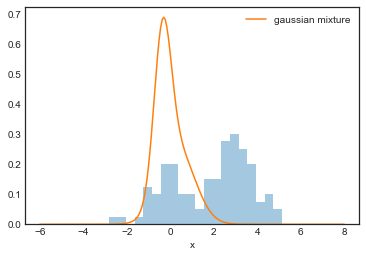

In [26]:
#mixture
sns.distplot(data, bins=20, kde=False, norm_hist=True)
g_both = [best_mix.pdf(e) for e in x]
plt.plot(x, g_both, label='gaussian mixture');
plt.legend();

![alt text](http://www.astroml.org/_images/fig_GMM_1D_1.png "Logo Title Text 1")

--------------------
<br>

요약<br>
----

- 가우시안 믹스처 모델 (GMM) 우리의 오래된 친구 가우시안에 다른 가우시안(들)을 더한 것이다.<br>
- 이것은 더 복잡한 데이터를 모델할 수 있게 해준다.<br>
- 기대값-최대화 (Expectation-Maximization, EM) 알고리즘으로 GMM을 fit한다.<br>
- 기대값-최대화 알고리즘은 latent variables가 있다면, 좋은 파라미터 추정을 위한 단계들의 series이다.<br>
- EM 단계들:<br>
   1. 파라미터 추정 initialize
   2. 현 파라미터 추정이 주어졌을 때, Z (데이터 + latent variables)에 대한 최소의 log likelihood를 찾는다.<br>
   3. 파라미터 추정 initialize<br>
   4. 2와 3단계를 반복한다.<br><br>
   
- EM은 GMM을 너머 사용할 수 있다.<br>
- GMM은 잘 동작한다. 그러나 가우시안들의 숫자를 알고 있어야 한다. KDE (Kernel Density Estimation)은 **추측이 필요없다.**<br>

<br>
<br> 
<br>

----